In [1]:
%matplotlib notebook
import numpy as np
import deepdish as dd
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
sns.set(style="ticks", palette="deep")

In [2]:
from utilities_eyetracker import *

In [3]:
video = dd.io.load(r"C:\Users\Benedetta\Documents\Python_code\stytra_scripts\190806_f1video.hdf5")

In [4]:
frame1 = video[0,:,:]

In [5]:
frame1[0]

array([255, 255, 255, ..., 142, 142, 143], dtype=uint8)

<IPython.core.display.Javascript object>


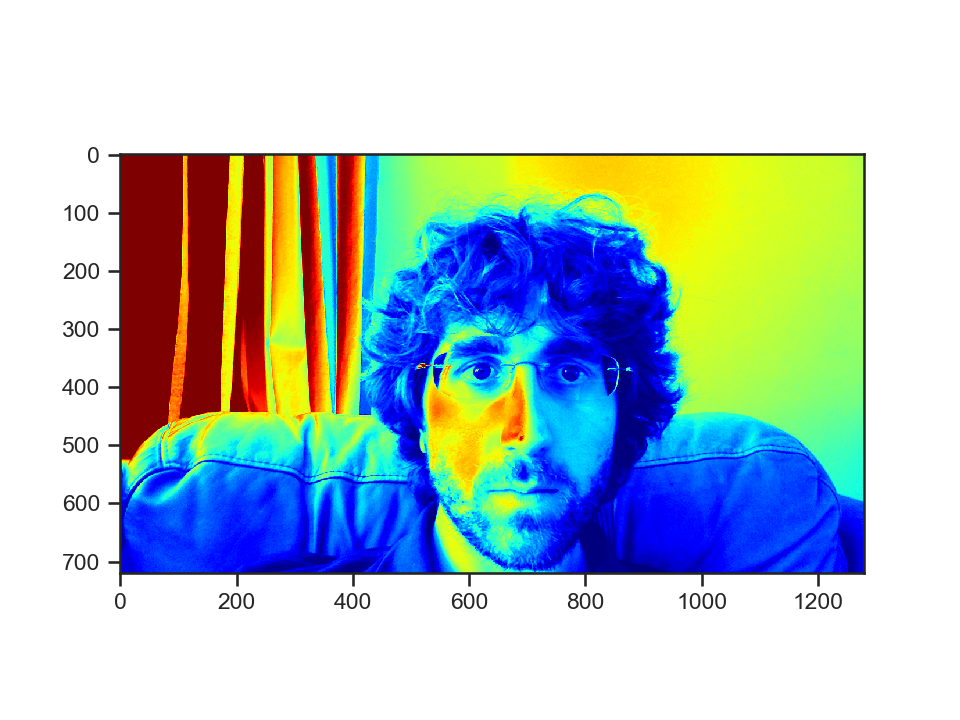

In [6]:
plt.imshow(video[0, :, :], cmap="jet")

In [13]:
cascade_dir = r"C:\Users\Benedetta\Documents\Python_code\stytra_scripts"
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [14]:
faces = face_cascade.detectMultiScale(frame1, 1.3, 5)

In [15]:
face = faces[0]

In [16]:
from matplotlib.patches import Rectangle

# I create a rectangle where the first two dimensions (a tuple) are the x and y of the vertex of the rectangle, and
# the third and fourth dimensions are the width and lenght
rect = Rectangle ((face[0], face[1]), face[2], face[3], linewidth = 3, edgecolor = 'g', facecolor = 'none')

In [17]:
starting_x = 0
starting_y = 0


face_x = starting_x + face[0]
face_y = starting_y + face [1]

print(face_x)
print(face_y)

481
215


<IPython.core.display.Javascript object>


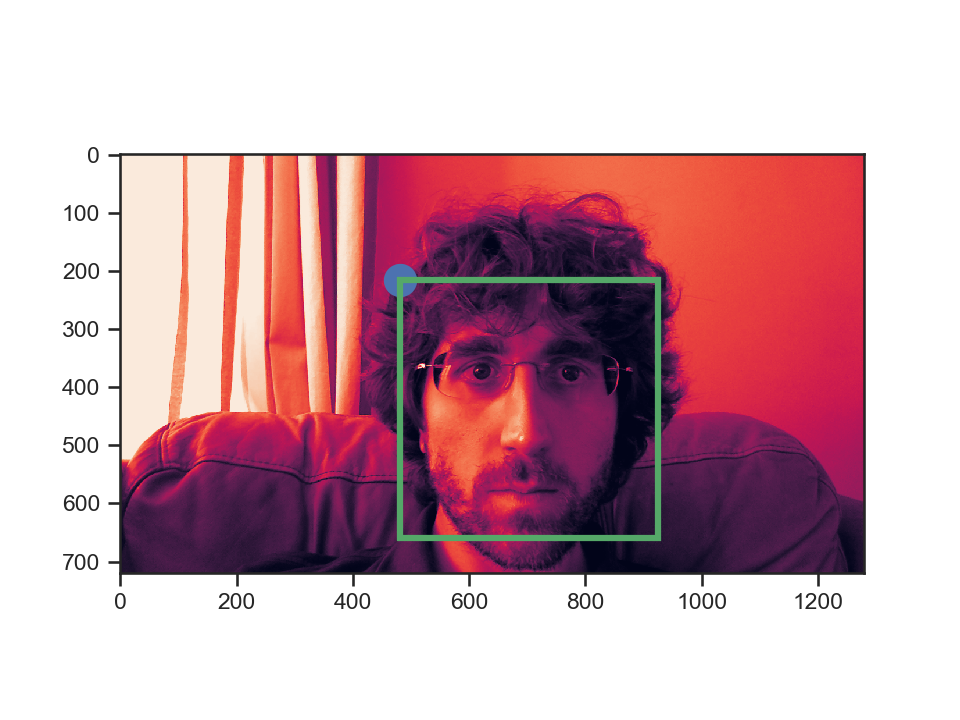

In [18]:
plt.figure ()

rect = Rectangle ((face[0], face[1]), face[2], face[3], linewidth = 3, edgecolor = 'g', facecolor = 'none')

plt.imshow(frame1)
plt.gca().add_patch(rect)
plt.scatter(face_x,face_y,linewidth = 10)


In [19]:
cut_face = frame1 [face[1]:(face[1]+face[3]), face[0]:(face[0]+face[2])]
eyes = eye_cascade.detectMultiScale(cut_face)

In [20]:
eyes.shape

(3, 4)

<IPython.core.display.Javascript object>


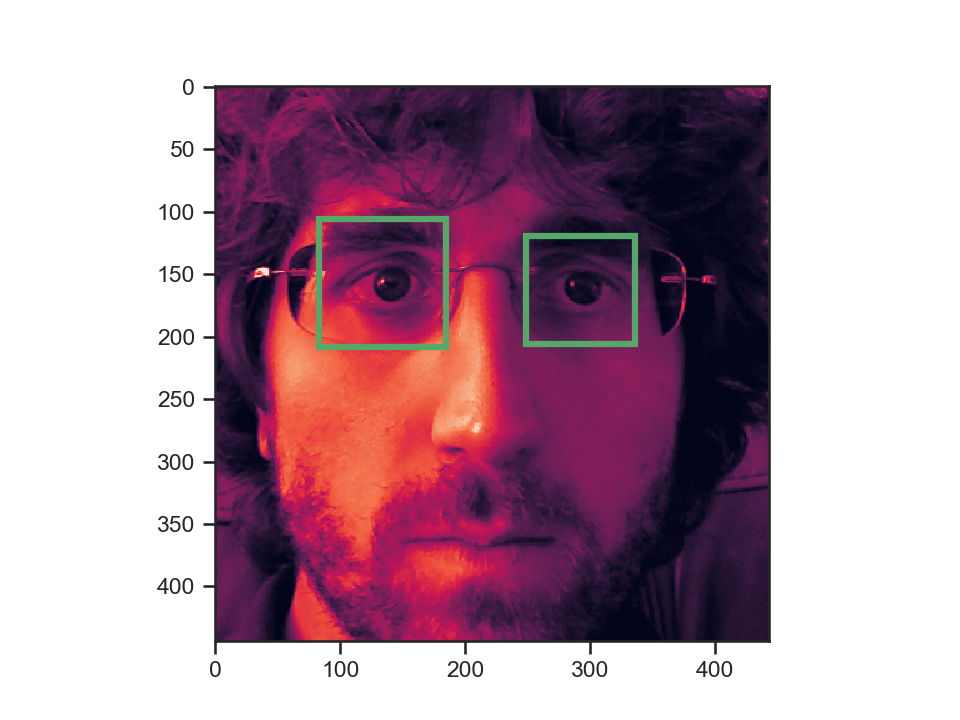

In [21]:
plt.figure()
plt.imshow(cut_face)

# in this loop I detect the eye-zone, with the same method used for the face
for (ex,ey,ew,eh) in eyes[0:2,:]: 
    eye_rect = Rectangle((ex,ey),ew,eh,linewidth = 3, edgecolor = 'g', facecolor = 'none')
    plt.gca().add_patch(eye_rect)


In [22]:
eye_x = face_x + ex
eye_y = face_y + ey

print(eye_x)
print(eye_y)

564
321


<IPython.core.display.Javascript object>


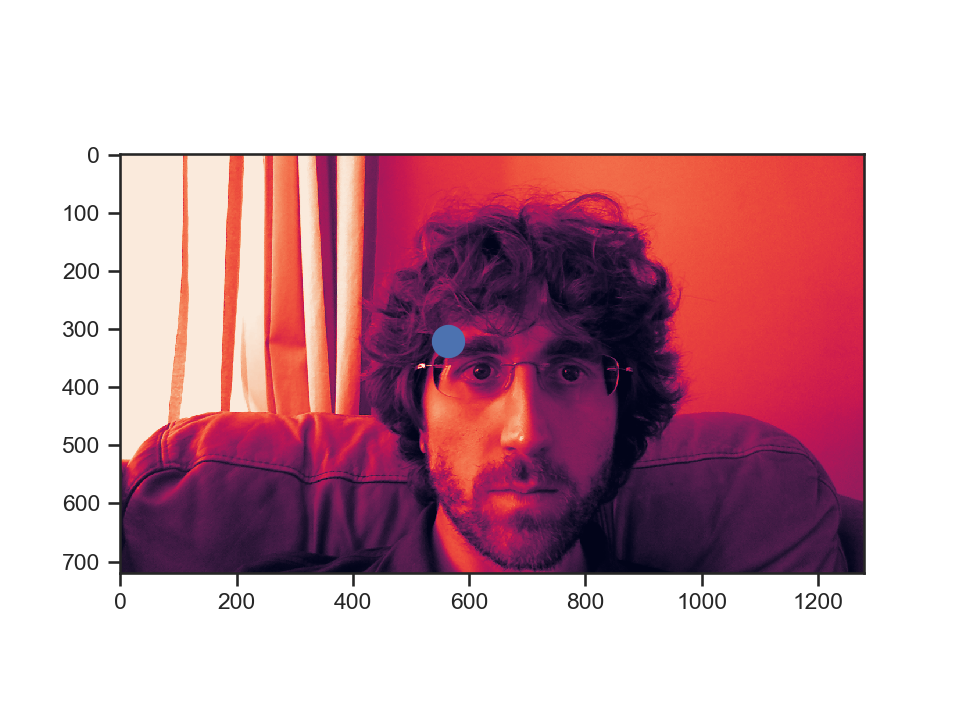

In [38]:
plt.figure ()
plt.imshow(frame1)
plt.scatter(eye_x,eye_y,linewidth = 10)


In [39]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
%autoreload
from utilities_eyetracker import detect_eyes
from utilities_eyetracker import detect_faces


<IPython.core.display.Javascript object>


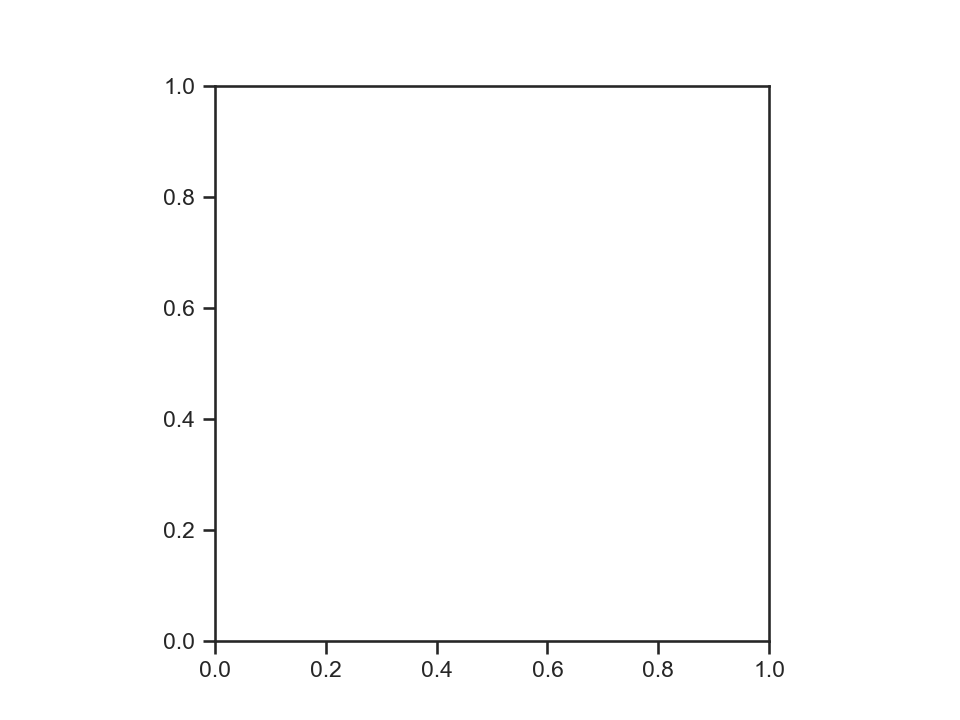

TypeError: Image data cannot be converted to float

In [41]:

detected_face = detect_faces(frame1,face_cascade)
plt.figure()
plt.imshow(detected_face)



In [21]:
detected_eyes = detect_eyes(detected_face,1)
print(detected_eyes[1].shape)

(84, 84)


<IPython.core.display.Javascript object>


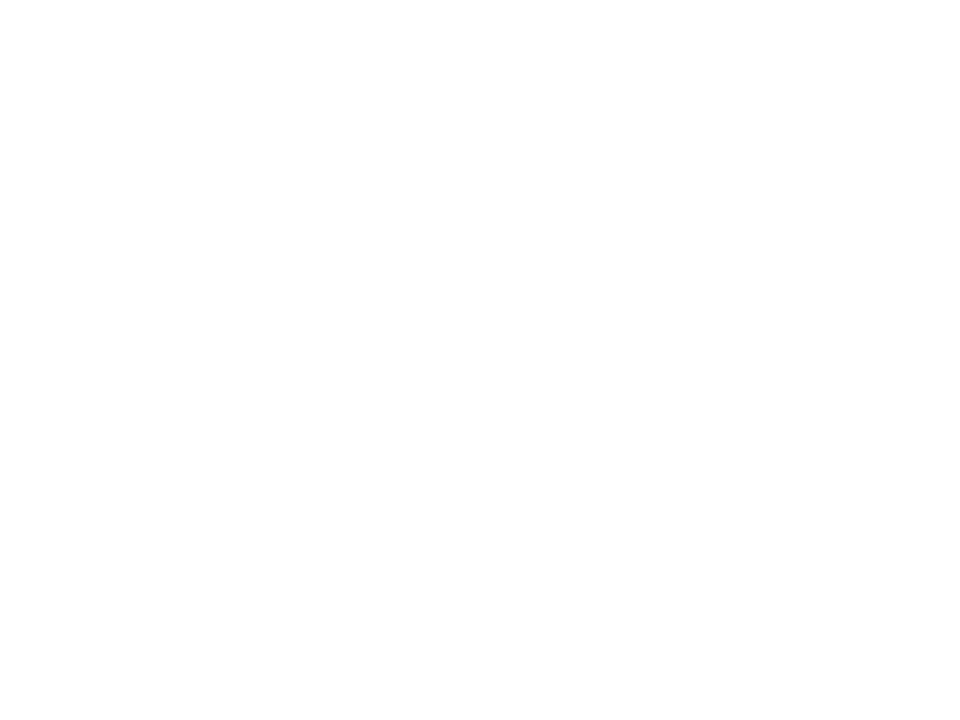

NameError: name 'detected_eyes' is not defined

In [42]:
plt.figure()
new_img = plt.imshow(detected_eyes[0])


In [23]:
# getting binary image
threshold = 45
_, img = cv2.threshold(detected_eyes[0], threshold, 255, cv2.THRESH_BINARY)

<IPython.core.display.Javascript object>


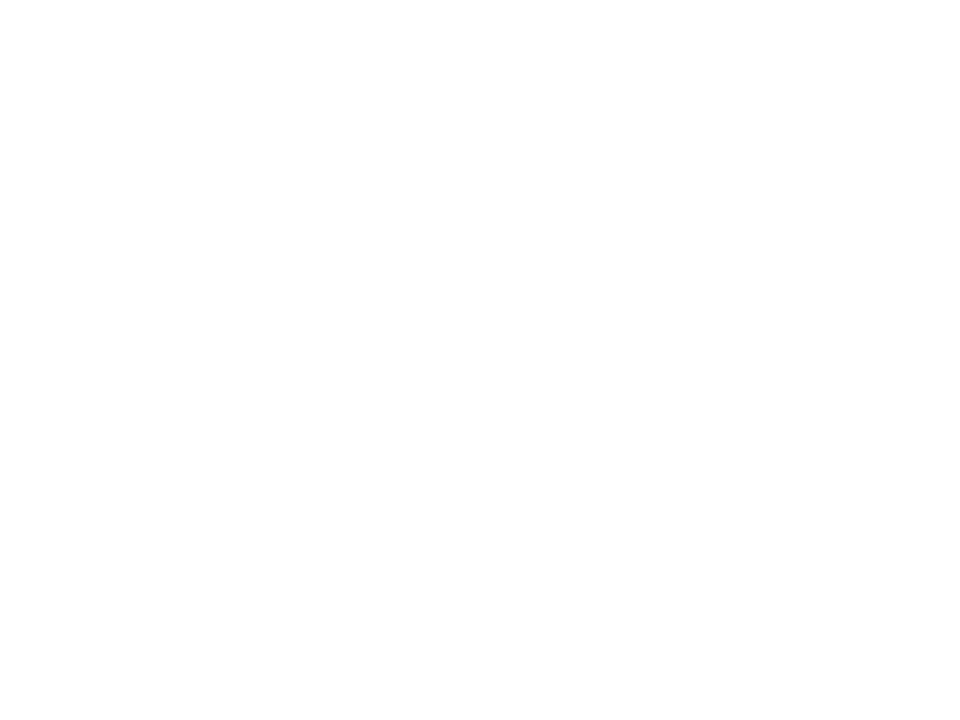

NameError: name 'img' is not defined

In [43]:
plt.figure()
plt.imshow(img)
img.shape

In [44]:
to_remove_x =  detected_eyes[1].shape[0] - img.shape[0]
to_remove_y = detected_eyes[1].shape[1] - img.shape[1]

# adding the dimensions os the 2D transformed img
eye2D_x = eye_x + img.shape[0]
eye2D_y = eye_y + img.shape[1]

print(eye2D_x)
print(eye2D_y)
print (to_remove_x)
print (to_remove_y)

NameError: name 'detected_eyes' is not defined

<IPython.core.display.Javascript object>


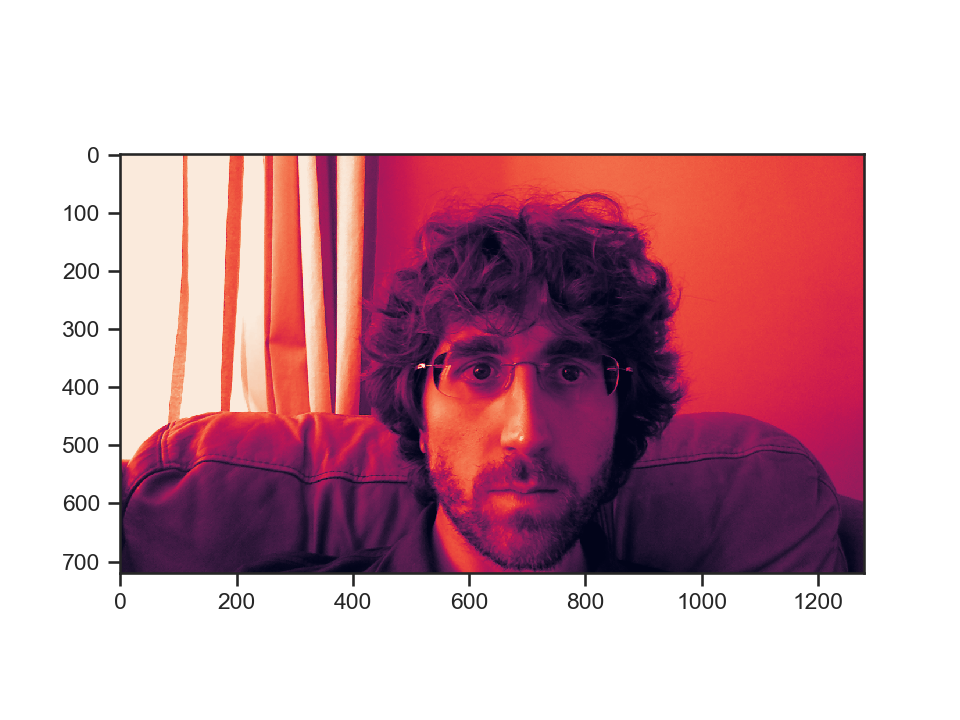

NameError: name 'eye2D_x' is not defined

In [45]:
plt.figure ()
plt.imshow(frame1)
plt.scatter(eye2D_x,eye2D_y,linewidth = 10)

In [46]:
%autoreload
from utilities_eyetracker import cut_eyebrows 

In [47]:

without_eyebrows = cut_eyebrows(img)
without_eyebrows.shape

NameError: name 'img' is not defined

In [48]:
to_remove_x =  without_eyebrows.shape[0] - detected_eyes[1].shape[0]
to_remove_y =  without_eyebrows.shape[1] - detected_eyes[1].shape[1]


# adding the dimensions os the 2D transformed eye with the eyebrow cutted
eye_cut_x = eye_x + to_remove_x
eye_cut_y = eye_y + to_remove_y

print(eye_cut_x)
print(eye_cut_y)
print (to_remove_x)
print (to_remove_y)


NameError: name 'without_eyebrows' is not defined

<IPython.core.display.Javascript object>


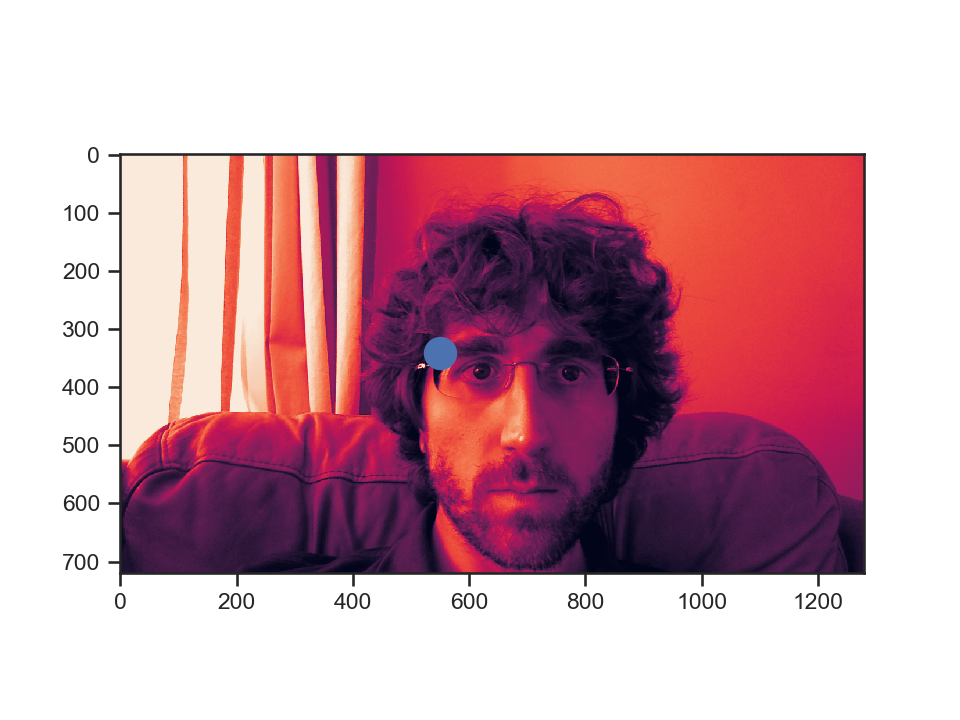

In [57]:
plt.figure ()
plt.imshow(frame1)
plt.scatter(eye_cut_x,eye_cut_y,linewidth = 10)

<IPython.core.display.Javascript object>


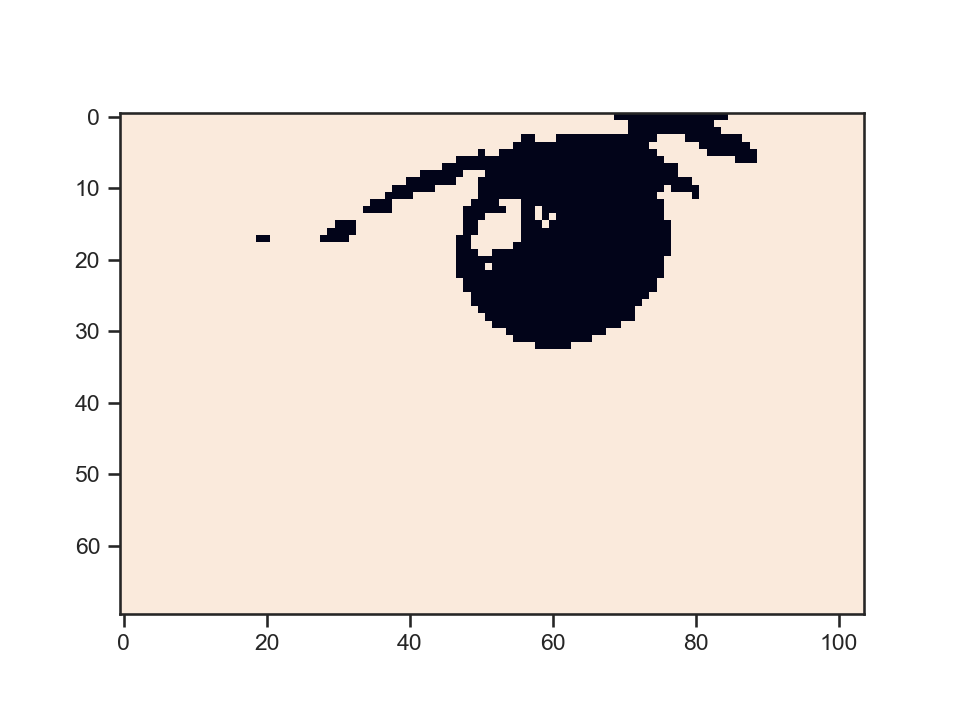

In [30]:

plt.figure()
plt.imshow(without_eyebrows)

In [35]:
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()
params.filterByCircularity = False
params.filterByInertia = False
params.filterByConvexity = False
params.filterByArea = True
params.minArea = 200
params.maxArea = 1500
detector = cv2.SimpleBlobDetector_create(params)

In [36]:
_, img = cv2.threshold(without_eyebrows, 0, 255, cv2.THRESH_BINARY)
img = cv2.medianBlur(img, 5) #3
keypoints = detector.detect(img)
print (keypoints)
draw = cv2.drawKeypoints(img, keypoints, img, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure()
plt.imshow(img)
plt.imshow(draw)

NameError: name 'without_eyebrows' is not defined

In [45]:
def blob_process(image, thresholding_params,blurring_params, lower_Area, higher_Area):
    _, img = cv2.threshold(image, thresholding_params, 255, cv2.THRESH_BINARY)
    
    
    
    
    img = cv2.erode(img, None, iterations=2) #1
    img = cv2.dilate(img, None, iterations=4) #2
    img = cv2.medianBlur(img, blurring_params) #3
   # img = cv2.medianBlur(img, blurring_params) #3
    # cleaning the puddings
    img[:1, :] = 255
    # Set up the detector with default parameters.
    params = cv2.SimpleBlobDetector_Params()
    params.filterByCircularity = False
    params.filterByInertia = False
    params.filterByConvexity = False
    params.filterByArea = True
    params.minArea = lower_Area
    params.maxArea = higher_Area
    detector = cv2.SimpleBlobDetector_create(params)

    keypoints = detector.detect(img)
    
    
    return keypoints

In [33]:
%autoreload
from utilities_eyetracker import blob_process 

In [34]:

keypoint = blob_process(without_eyebrows, 40, 5, detector)
print (keypoint)

[<KeyPoint 000002301368A120>]


In [60]:
pt = cv2.KeyPoint_convert(keypoint)
pt[0,:]

array([62.982185, 15.108502], dtype=float32)

In [58]:


# adding the dimensions os the 2D transformed eye with the eyebrow cutted
final_x = eye_cut_x + pt[0,0]
final_y = eye_cut_y + pt[0,1]

print(final_x)
print(final_y)

612.9821853637695
356.1085023880005


<IPython.core.display.Javascript object>


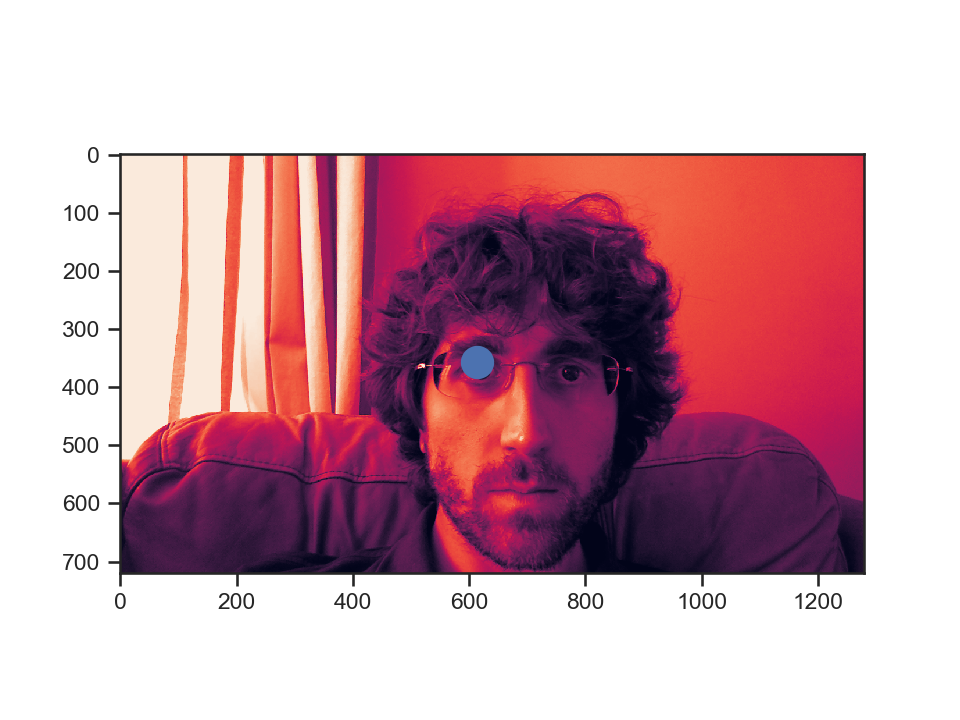

In [59]:
plt.figure ()
plt.imshow(frame1)
plt.scatter(final_x,final_y,linewidth = 10)

In [113]:
cv2.imshow('image', without_eyebrows)

without_eyebrows = cv2.drawKeypoints(without_eyebrows, keypoint, without_eyebrows, (255, 0, 0))

In [55]:
cv2.imshow('image', frame1)

frame1 = cv2.drawKeypoints(frame1, keypoint, frame1, (255, 0, 0))

<IPython.core.display.Javascript object>


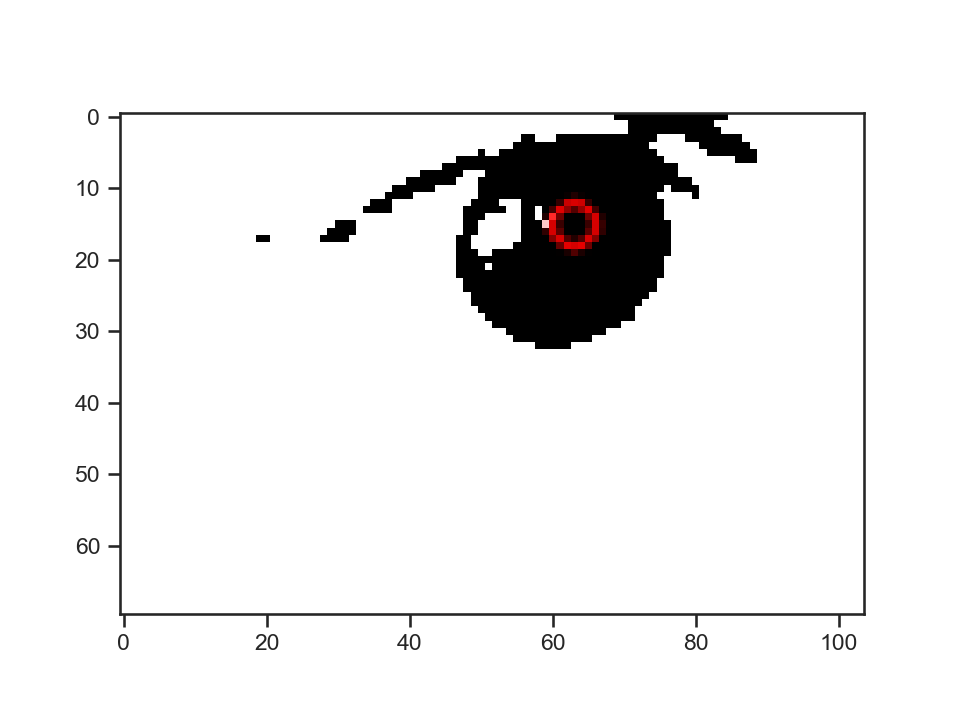

In [114]:
plt.figure()
plt.imshow(without_eyebrows)

In [277]:
def main():
    cap = cv2.VideoCapture(0)
    cv2.namedWindow('image')
    cv2.createTrackbar('threshold', 'image', 0, 255, nothing)
    while True:
        _, frame = cap.read()
        face_frame = detect_faces(frame, face_cascade)
        if face_frame is not None:
            eyes = detect_eyes(face_frame, eye_cascade)
            for eye in eyes:
                if eye is not None:
                    threshold = cv2.getTrackbarPos('threshold', 'image')
                    eye = cut_eyebrows(eye)
                    keypoints = blob_process(eye, threshold, detector)
                    eye = cv2.drawKeypoints(eye, keypoints, eye, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        cv2.imshow('image', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [85]:
face_coord, face_frame = detect_faces(frame1, face_cascade)
    # saving coords of the face
starting_x = 0
starting_y = 0
print(face_coord)
face_coord, face_frame = detect_faces(frame1, face_cascade)
    # saving coords of the face
starting_x = 0
starting_y = 0
print(face_coord)


face_x = starting_x + face_coord[0,0]
face_y = starting_y + face_coord[0,1]


if face_frame is not None:
    print("face detected")
    eye_coord, left_eye, right_eye = detect_eyes(face_frame, eye_cascade)
    eyes = left_eye, right_eye

face_x = starting_x + face_coord[0,0]
face_y = starting_y + face_coord[0,1]



eye_coord, left_eye, right_eye = detect_eyes(face_frame, eye_cascade)
eyes = left_eye, right_eye
print (len(eyes))

print (eye_coord[0,0])

[[481 215 444 444]]
[[481 215 444 444]]
face detected
2
80


In [93]:
for current_eye, eye in enumerate(eyes):
#for eye in eyes:
    print (eye)§
    eye_x = face_x + eye_coord[current_eye,0]
    eye_y = face_y + eye_coord[current_eye,1]
    print(eye_x)
    print(eye_y)

[[102 103 103 ...  90  86  86]
 [129 129 123 ...  89  87  88]
 [130 124 116 ...  87  85  86]
 ...
 [176 176 174 ... 185 180 177]
 [178 176 176 ... 184 180 178]
 [178 179 176 ... 185 182 179]]
561
321
[[58 50 44 ... 11 13 13]
 [54 51 46 ... 13 13 13]
 [50 48 45 ... 15 14 15]
 ...
 [74 73 72 ... 83 81 80]
 [77 76 72 ... 83 81 81]
 [77 76 74 ... 85 84 84]]
726
336


In [34]:
x, y, eye = cut_eyebrows(eye)
print (eye_x)
print(eye.shape[0])
to_remove_x = eye_x - x
to_remove_y = eye_x - y

print (to_remove_x)
print (to_remove_y)


NameError: name 'eye' is not defined

In [99]:
def cut_eyebrows(img):
    x = img.shape[0]
    y = img.shape[1]
    height, width = img.shape[:2]
    eyebrow_h = int(height / 3)
    img = img[eyebrow_h:height, 0:width]  # cut eyebrows out (15 px)
    return x, y, img

In [70]:
b = np.array([105,124,97,97])
a = np.array([264, 132,  85,  85])
c = [a, b]
d = np.array(c)
print(d)



[[264 132  85  85]
 [105 124  97  97]]


In [71]:
#c.sort(axis=0)
print(d[0][0])
print (d[1][0])

264
105


In [72]:
if d[0][1] < d[1][0]:
    d = np.array([d[0, :], d[1, :]])
else:
    d = np.array([d[1, :], d[0, :]])
    
print (d)

[[105 124  97  97]
 [264 132  85  85]]


In [95]:
for current_eye, eye in enumerate(c):
    print(eye)
    prova[current_eye,1]
    print(prova[current_eye,1])

[1 5 9]


TypeError: 'NoneType' object is not subscriptable

In [12]:
if c[0,0]<c[1,0]:
    c = np.array([c[0,:], c[1,:]])
    print (c)
else:
    c = np.array([c[1,:], c[0,:]])
    print(c)

[[ 3  7 11]
 [ 5  5  9]]


In [142]:
counter = 200
time_interval = 100
if np.mod(counter,time_interval) == 0:
    print("ok")

ok


In [7]:
def my_function():
    a = np.array([5,5,9])
    b = np.array([3,7,11])
    
    return a
    return b

In [8]:
my_function()

(array([5, 5, 9]), array([ 3,  7, 11]))

In [6]:
my_function()

array([5, 5, 9])